In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from minian import utilities

,0
count,159.000000
mean,39.289308
std,49.437257
min,1.000000
25%,12.500000
50%,26.000000
75%,43.000000
max,335.000000


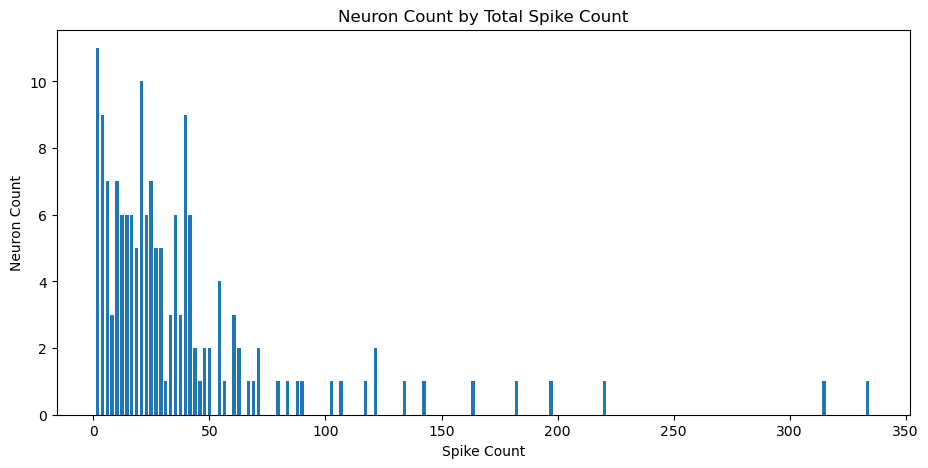

In [14]:
#Plot and save a spike density histogram, as well as get statistics

def preprocess_spike_data(spike_trains):
    '''
    Function for preprocessing the raw spike train data
    Removes spike residues by setting consecutive non-leading values to 0 and normalizes all non-zero values to 1
    Input is 2d numpy array
    Output is 2d numpy array
    '''
    
    for i in range(np.size(spike_trains, axis=0)):
        for j in range(np.size(spike_trains[i], axis=0) -1, 0, -1):
            if spike_trains[i][j] != 0 and spike_trains[i][j-1] != 0:
                spike_trains[i][j] = 0
            if spike_trains[i][j] != 0 and spike_trains[i][j-1] == 0:
                spike_trains[i][j] = 1
        if spike_trains[i][0] != 0:
            spike_trains[i][0] = 1
    return spike_trains

dpath = "/hpc/mzhu843/image-processing/minian/results/experiment5/vars"

minian_ds = utilities.open_minian(dpath)
spikes_data = minian_ds['S'].values
neuron_counts = np.sum(preprocess_spike_data(spikes_data), axis=1)

fig, ax = plt.subplots(figsize=(11, 5))
plt.hist(neuron_counts, bins=np.size(neuron_counts, axis=0), width=1.5)
plt.xlabel('Spike Count')
plt.ylabel('Neuron Count')
plt.title('Neuron Count by Total Spike Count')
plt.savefig('/hpc/mzhu843/image-processing/minian/visualisations/experiment5/final/neuron count by total spikes')

df_describe = pd.DataFrame(neuron_counts)
df_describe.describe()

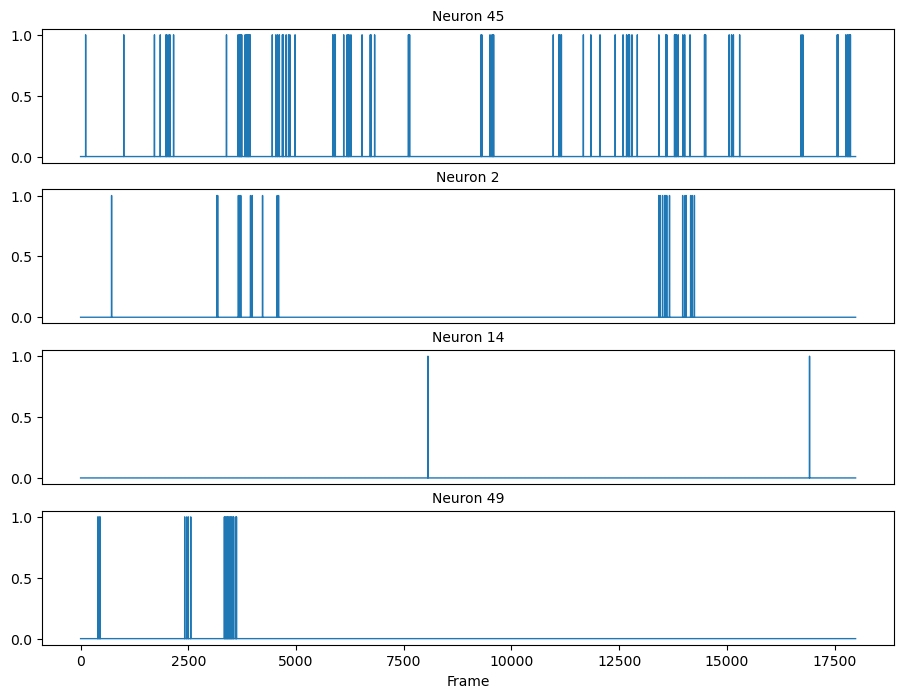

In [65]:
#Plotting and saving a comparison of spike trains

def preprocess_spike_data(spike_trains):
    '''
    Function for preprocessing the raw spike train data
    Removes spike residues by setting consecutive non-leading values to 0 and normalizes all non-zero values to 1
    Input is 2d numpy array
    Output is 2d numpy array
    '''
    
    for i in range(np.size(spike_trains, axis=0)):
        for j in range(np.size(spike_trains[i], axis=0) -1, 0, -1):
            if spike_trains[i][j] != 0 and spike_trains[i][j-1] != 0:
                spike_trains[i][j] = 0
            if spike_trains[i][j] != 0 and spike_trains[i][j-1] == 0:
                spike_trains[i][j] = 1
        if spike_trains[i][0] != 0:
            spike_trains[i][0] = 1
    return spike_trains

dpath = "/hpc/mzhu843/image-processing/minian/results/experiment5/vars"

minian_ds = utilities.open_minian(dpath)
spiking_data = preprocess_spike_data(minian_ds['S'].values)

fig, axs = plt.subplots(4, 1, figsize=(11, 8))  

axs[0].plot(spiking_data[44], linewidth=1)
axs[0].set_title('Neuron 45', fontsize=10)
axs[0].set_xticks([])  
axs[0].set_xlabel('')  

axs[1].plot(spiking_data[1], linewidth = 1)
axs[1].set_title('Neuron 2', fontsize=10)
axs[1].set_xticks([])  
axs[1].set_xlabel('')  

axs[2].plot(spiking_data[13], linewidth = 1)
axs[2].set_title('Neuron 14', fontsize=10)
axs[2].set_xticks([])  
axs[2].set_xlabel('')  

axs[3].plot(spiking_data[48], linewidth = 1)
axs[3].set_title('Neuron 49', fontsize=10)
axs[3].set_xlabel('Frame')

plt.savefig('/hpc/mzhu843/image-processing/minian/visualisations/experiment5/final/selection of spike trains')



In [7]:
def preprocess_spike_data(spike_trains):
    '''
    Function for preprocessing the raw spike train data
    Removes spike residues by setting consecutive non-leading values to 0 and normalizes all non-zero values to 1
    Input is 2d numpy array
    Output is 2d numpy array
    '''
    
    for i in range(np.size(spike_trains, axis=0)):
        for j in range(np.size(spike_trains[i], axis=0) -1, 0, -1):
            if spike_trains[i][j] != 0 and spike_trains[i][j-1] != 0:
                spike_trains[i][j] = 0
            if spike_trains[i][j] != 0 and spike_trains[i][j-1] == 0:
                spike_trains[i][j] = 1
        if spike_trains[i][0] != 0:
            spike_trains[i][0] = 1
    return spike_trains

dpath = "/hpc/mzhu843/image-processing/minian/results/experiment5/vars"
minian_ds = utilities.open_minian(dpath)
spiking_data = minian_ds['S'].values
calcium_data = minian_ds['C'].values

np.save('/hpc/mzhu843/modelling/nest/DATA/raw/spikes/S_5', spiking_data)
np.save('/hpc/mzhu843/modelling/nest/DATA/raw/calcium traces/C_5', calcium_data)





In [ ]:
neuron_indices = [32, 34, 69, 74, 156]

dpath = "/hpc/mzhu843/minian/results/experiment5/vars"
minian_ds = utilities.open_minian(dpath)
footprints = minian_ds['A'].values[neuron_indices]

# Create the plot
fig, ax = plt.subplots()
img = ax.imshow(np.sum(footprints, axis=0))

# Annotate each neuron with an offset
for i, neuron_index in enumerate(neuron_indices):
    # Find the coordinates of the neuron
    y, x = np.unravel_index(np.argmax(footprints[i]), footprints[i].shape)
    # Add offset to the coordinates to prevent overlapping
    ax.annotate(f'N{i+1}', (x + 5, y + 18), color='white', fontsize=8, ha='center', va='center',
                bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

plt.savefig('/hpc/mzhu843/modelling/nest/plots/selected_5_neurons_labeled.png')
plt.show()